# TP2 - Clustering par K-Means

Data : https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv

## 1. Initialisez votre environnement 

Initialisez votre environnement en important pandas, numpy, matplotlib.pyplot (sous l'alias plt) et KMeans depuis sklearn.cluster

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


## 2 Charger le jeu de données 
Chargez le jeu de données dans un DataFrame pandas depuis l'URL fournie. Vérifiez les dimensions du tableau et affichez les premières lignes pour valider le chargement.

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/satishgunjal/datasets/master/Mall_Customers.csv")

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Exploration
Répondez aux questions d'exploration : quelles sont les statistiques descriptives des variables numériques ? Y a-t-il des valeurs nulles ? Utilisez df.describe() et df.info()

In [10]:
print(data.describe())
print(data.info())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age              

## 4. Renommez des colonnes
Renommez les colonnes 'Annual Income (k$)' et 'Spending Score (1-100)' en 'AnnualIncome' et 'SpendingScore' pour faciliter la manipulation. Contrôlez le résultat en affichant df.columns.

In [11]:
data.rename(columns={"Annual Income (k$)": "AnnualIncome", "Spending Score (1-100)": "SpendingScore"}, inplace=True)

data.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

## 5. Nuage de point

Proposez une première visualisation du couple (AnnualIncome, SpendingScore) à l'aide d'un nuage de points. Interprétez brièvement la répartition obtenue.

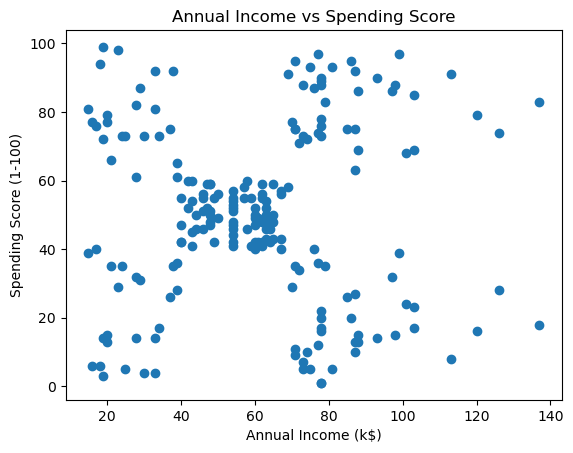

In [12]:
plt.scatter(data['AnnualIncome'], data['SpendingScore'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

Dans le graph ci dessus, on voit que 5 groupe se créer, avec au centre la majorité des personnes, faisant partie de la moyenne, et aux extremité des personne gagnant peu et depensant peu, gagnant peu et depensant beaucoup, gagnant beaucoup et depensant peu, et gagnant beaucoup et depensant peu. On remarque que sur les extremités de chaques axes, on ne retrouve jamais de valeur moyenne pour l'autre, indiquant que les personnes sont soit aux extreme partout, soit modéré partout.

## 6. Matrice caractéristique

Construisez la matrice de caractéristiques X à partir des colonnes AnnualIncome et SpendingScore (utilisez df.loc[:, ["AnnualIncome", "SpendingScore"]].values) et vérifiez les premières lignes.

In [13]:
X = data.loc[:, ["AnnualIncome", "SpendingScore"]].values

## 7. Cluster pertinent

Déterminez un nombre de clusters pertinent en appliquant la méthode du coude : pour k allant de 1 à 10, entraînez un modèle KMeans (initialisation aléatoire, random_state=42) et stockez l'inertie associée. Tracez l'évolution de l'inertie en fonction de k et commentez le point de coude

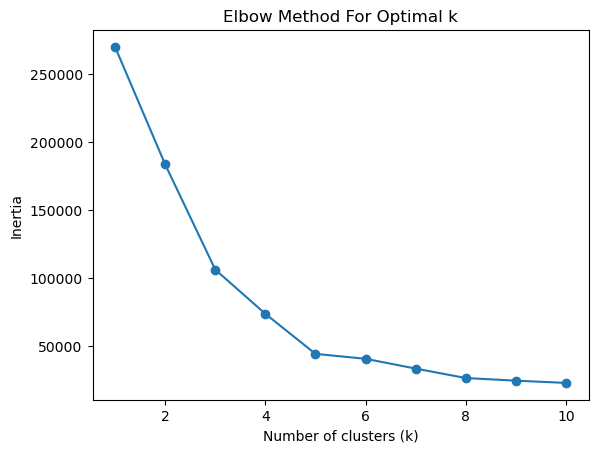

In [14]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Ici un K pertinent serait 5, car apres ce point on ne note que des amélioration marginale.

## 8. Modele KMeans
Entraînez un modèle KMeans avec k=5 (random_state=42) sur la matrice X. Récupérez les étiquettes prédites pour chaque client.

In [15]:
kmeans_5 = KMeans(n_clusters=5, random_state=42)
labels = kmeans_5.fit_predict(X)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## 9. Etiquettes
Ajoutez ces étiquettes comme nouvelle colonne 'Cluster' dans le DataFrame d'origine. Analysez les caractéristiques de chaque segment : effectifs par cluster, moyenne du revenu et du score de dépenses. 

In [16]:
data['Cluster'] = labels

# Effectifs par cluster
effectifs = data['Cluster'].value_counts().sort_index()

# Moyenne du revenu et du score de dépenses par cluster
moyennes = data.groupby('Cluster')[['AnnualIncome', 'SpendingScore']].mean()

print("Effectifs par cluster:\n", effectifs)
print("\nMoyenne du revenu et du score de dépenses par cluster:\n", moyennes)

Effectifs par cluster:
 Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64

Moyenne du revenu et du score de dépenses par cluster:
          AnnualIncome  SpendingScore
Cluster                             
0           55.296296      49.518519
1           86.538462      82.128205
2           25.727273      79.363636
3           88.200000      17.114286
4           26.304348      20.913043


## 10. Visualisation finale
Visualisez les clusters sur le plan (AnnualIncome, SpendingScore) en attribuant une couleur par segment. Vérifiez la cohérence avec vos observations précédentes. 

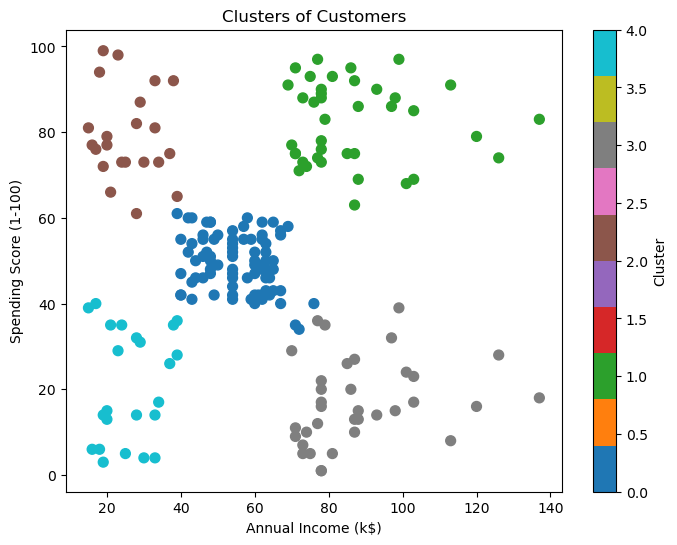

In [17]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data['AnnualIncome'], data['SpendingScore'], c=data['Cluster'], cmap='tab10', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of Customers')
plt.colorbar(scatter, label='Cluster')
plt.show()